In [ ]:
# TODO: create a pyproject.toml file and use poetry to install dependencies
%pip install -qqq --upgrade pip setuptools wheel
%pip install -qqq --upgrade numpy pandas seaborn tqdm sdnist
%pip install -qqq --upgrade smartnoise-synth # sdv synthcity
%pip install -qqq --upgrade git+https://github.com/ryan112358/private-pgm.git disjoint_set

In [1]:
import warnings
import itertools as it

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

from pipeline import load_generate_evaluate

warnings.filterwarnings("ignore")

/Users/shlomi/projects/YDNPD/pipeline.py:19: UserWarning: SynthCity is not installed. Please install it to use SynthCity models.
  warnings.warn("SynthCity is not installed. Please install it to use SynthCity models.")
/Users/shlomi/projects/YDNPD/pipeline.py:25: UserWarning: SDV is not installed. Please install it to use SDV models.
  warnings.warn("SDV is not installed. Please install it to use SDV models.")


In [ ]:
DATASET_NAMES = ["baseline_domain", "baseline_univariate",
                 "ma2019", "tx2019", "national2019"]

# SDV: GaussianCopula, CTGAN, TVAE, CopulaGAN
# SmartNoise: "aim", "mwem", "mst", "pacsynth", "dpctgan", "patectgan"
# synthcity: 'dpgan', 'privbayes', 'adsgan', 'decaf', 'pategan', 'AIM'
MODEL_NAMES = ["mst", "aim"]  # "aim", "mwem", "mst", "privbayes"

EPSILONS = [1, 10, 100]

configurations = list(it.product(DATASET_NAMES, MODEL_NAMES, EPSILONS))

reports = [{"dataset": dataset_name,
            "model": model_name,
            "epsilon": epsilon,
            "report": load_generate_evaluate(dataset_name, "demographic",
                                             model_name, epsilon,
                                             show_report=False)
            } for dataset_name, model_name, epsilon in tqdm(configurations)]        

In [4]:
# def l1_corr(report):

#     corr = pd.read_csv(report.output_directory /
#                 report.data["Correlations"]
#                 ["pearson correlation difference"]
#                 ["correlation_difference"],
#                 index_col=0)

#     return np.triu(corr.abs()).sum()


# reports_df = pd.DataFrame(reports)
# reports_df["k_marginal_score"] = (reports_df["report"]
#                                   .apply(lambda x: x.data["k_marginal"]["k_marginal_synopsys"]["k_marginal_score"])
# )
# reports_df["l1_corr"] = reports_df["report"].apply(l1_corr)

# reports_df.to_pickle("../results/reports.pkl")

reports_df = pd.read_pickle("../results/reports.pkl")

In [2]:
def plot_utility_pivacy_tradeoff(reports_df, metric):
    g = sns.relplot(data=reports_df,
                    x="epsilon", y=metric,
                    hue="dataset", col="model",
                    kind="line",
                    linewidth=2)
    g.set(xscale="log")
    return g

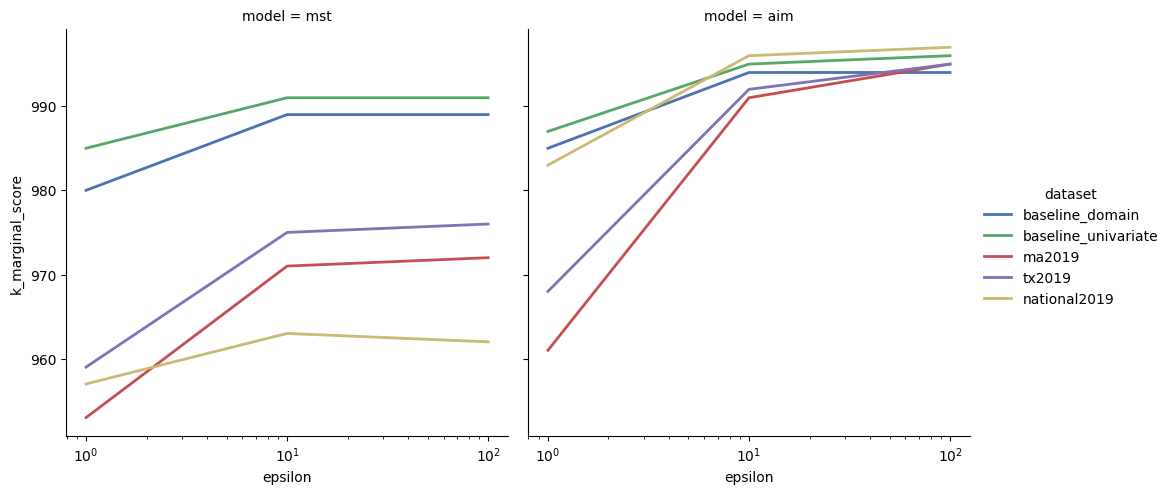

In [5]:
plot_utility_pivacy_tradeoff(reports_df, "k_marginal_score")

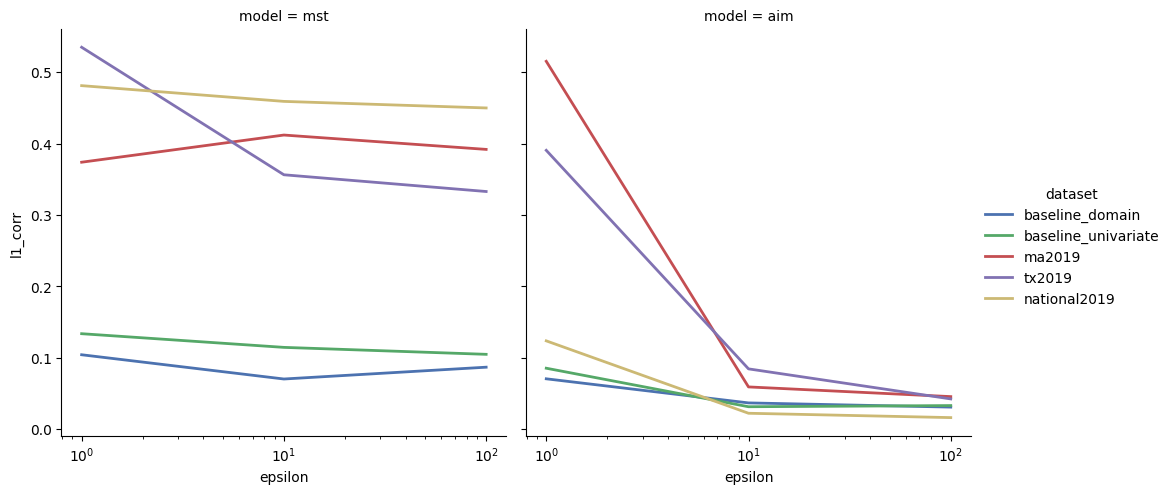

In [7]:
plot_utility_pivacy_tradeoff(reportets_df, "l1_corr")